# Car Insurance Claim Prediction

Predict whether the policyholder will file a claim in the next 6 months or not. 

Dataset from: https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification

**Files**:
- Folder path: 'Data/'
- train.csv: Contains training dataset
- test.csv: Prediction dataset (does not contain the target label)
- sample_submission.csv: Example of submission format for the given testing dataset

=> Use train dataset for train and testing 

# Set Up Environment

## Import Libraries 

In [34]:
# Data Manipulation 
import pandas as pd
import numpy as np
import re

# Math
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting
from sklearn.model_selection import train_test_split

# Modelling Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# Sklearn Modelling
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier

# Sklearn Feature Selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import ElasticNetCV

# Sklearn hyperparameter tuning and cross-validation
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import metrics

# Evaluation Metrics
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from xgboost import plot_importance


## Import Dataset

In [2]:
# Load Data
df = pd.read_csv('Data/train.csv') 

In [3]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


---
**Columns**

---

0. **policy_id (object)**: unique identifier - Remove 
1. **policy_tenure (float64)**: Time period of the policy - Policy                    
2. **age_of_car (float64)**: Normlised age of the car in years - Car
3. **age_of_policyholder (float64)**: Normalised age of policyholder in years - Policyholder
4. **area_cluster (object)**: Area cluster of the policyholder - Policyholder 
5. **population_density (int64)**: Population density of the city - Policyholder   
6. **make (int64)**: Encoded Manufacturer/company of the car - Car  
7. **segment (object)**: Segment of the car (A/B1/B2/C1/C2) - Car 
8. **model (object)**: Encoded name of the car - Car 
9. **fuel_type (object)**: Type of fuel used by the car - Car 
10. **max_torque (object)**: Maximum Torque generated by the car (Nm@rpm) - Car  
11. **max_power (object)**: Maximum Power generated by the car (bhp@rpm) - Car 
12. **engine_type (object)**: Type of engine used in the car - Car 
13. **airbags (int64)**: Number of airbags installed in the car - Car  
14. **is_esc (object)**: Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not - Car 
15. **is_adjustable_steering (object)**: Boolean flag indicating whether the steering wheel of the car is adjustable or not - Car
16. **is_tpms (object)**: Boolean flag indicating whether Typre Pressure Monitoring System (TPMS) is present in the car or not - Car 
17. **is_parking_sensors (object)**: Boolean flag indicating whether parking sensors are present in the car or not - Car 
18. **is_parking_camera (object)**: Boolean flag indicating whether the parking camera is present in the car or not - Car 
19. **rear_brakes_type (object)**: Type of breakes used in the rear of the car - Car 
20. **displacement (int64)**: Engine displacement of the car (cc) - Car  
21. **cylinder (int64)**: Number of cylinders present in the engine of the car - Car  
22. **transmission_type (object)**: Transmission type of the car (auto or manual) - Car 
23. **gear_box (int64)**: Number of gears in the car - Car  
24. **steering_type (object)**: Type of the power steering present in the car (Power or Electric) - Car 
25. **turning_radius (float64)**: The space a vehicle needs to make a certain turn (Meters) - Car
26. **length (int64)**: Length of the car (millimetre) - Car  
27. **width (int64)**: Width of the car (millimetre) - Car  
28. **height (int64)**: Height of the car (millimetre) - Car  
29. **gross_weight (int64)**: The maximum allowable weight of the fully-loaded car, inclduing passengers, cargo and equipment (Kg) - Car  
30. **is_front_fog_lights (object)**: Boolean flag indicating whether front fog lights are available in the car or not - Car 
31. **is_rear_window_wiper (object)**: Boolean flag indicating whether rear window wiper is available in the car or not - Car 
32. **is_rear_window_washer (object)**: Boolean flag indicating whether rear window washer is available in the car or not - Car 
33. **is_rear_window_defogger (object)**: Boolean flag indicating whether rear window defogger is available in the car or not - Car 
34. **is_brake_assist (object)**: Boolean flag indicating whether the brake assistance feature is available in the car or not - Car 
35. **is_power_door_locks (object)**: Boolean flag indicating whether a power door lock is avialble in the car or not - Car 
36. **is_central_locking (object)**: Boolean flag indicating whether the central locking feature is available in the car or not - Car 
37. **is_power_steering (object)**: Boolean flag indicating whether power steering is available in the car or not - Car 
38. **is_driver_seat_height_adjustable (object)**: Boolean flag indicating whether the height of the driver seat is adjustable or not - Car 
39. **is_day_night_rear_view_mirror (object)**: Boolean flag indicating whether day & night rearview mirror is present in the car or not - Car 
40. **is_ecw (object)**: Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not - Car 
41. **is_speed_alert (object)**: Boolean flag indicating whether the speed alert system is available in the car or not - Car 
42. **ncap_rating (int64)**: Safety rating given by NCAP (out of 5) - Car  
43. **is_claim (int64)**: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not   

In [4]:
df['policy_id'].nunique()

58592

## Train Test Split

In [5]:
train_df, test_df = train_test_split(df,test_size=0.2, random_state=123,stratify=df['is_claim'])

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (46873, 44)
Test shape: (11719, 44)


# Data Exploration

## Missing Values

In [6]:
# Check for Null Values
train_df.isnull().values.any()

False

## Unique & Constant Values

Unique identifier or constant (without any variance in the data) do not add any information to the modelling. Remove them.

In [7]:
constant_unique_col = train_df.columns[(train_df.nunique() == 1) | (train_df.nunique() == len(train_df))]
print("Constant or unique columns:", list(constant_unique_col))


Constant or unique columns: ['policy_id', 'policy_tenure']


In [8]:
train_df['policy_tenure']

56028    0.304135
7550     1.029043
41024    0.722817
16155    0.992249
42083    0.088165
           ...   
44675    0.565635
25342    0.436947
46632    0.645659
47899    0.298040
38077    1.054904
Name: policy_tenure, Length: 46873, dtype: float64

- Keep policy tenure and remove policy_id as it's a unique identifier

In [9]:
train_df.drop(columns = 'policy_id', inplace = True)
test_df.drop(columns = 'policy_id', inplace = True)

## Data Types

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46873 entries, 56028 to 38077
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     46873 non-null  float64
 1   age_of_car                        46873 non-null  float64
 2   age_of_policyholder               46873 non-null  float64
 3   area_cluster                      46873 non-null  object 
 4   population_density                46873 non-null  int64  
 5   make                              46873 non-null  int64  
 6   segment                           46873 non-null  object 
 7   model                             46873 non-null  object 
 8   fuel_type                         46873 non-null  object 
 9   max_torque                        46873 non-null  object 
 10  max_power                         46873 non-null  object 
 11  engine_type                       46873 non-null  object 
 12  

- **make (int64)**: Encoded Manufacturer/company of the car - Car => **to object**

In [11]:
train_df['make'] = train_df['make'].astype('object')
train_df['make'].dtype

dtype('O')

# EDA

## Target Variable

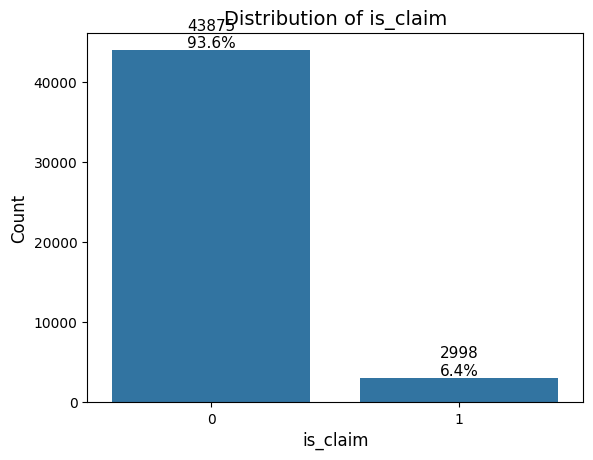

In [12]:
# Count plot of target variable 'is_claim'
ax = sns.countplot(x='is_claim', data=train_df)

# Add counts and percentages on top of bars
total = len(train_df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position (center of each bar)
        p.get_height(),                 # y position (top of each bar)
        f'{count}\n{percentage:.1f}%',# label text
        ha='center', va='bottom', fontsize=11
    )

# Set titles and labels
ax.set_title('Distribution of is_claim', fontsize=14)
ax.set_xlabel('is_claim', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

- The dataset is heavily imbalanced, with 93.6% of customers having not made a claim.
- For a propensity modelling task, this imbalance is not a major issue, since evaluation metrics such as ROC-AUC are relatively robust to class imbalance.
- However, in the case of hard-classification, class-rebalancing techniques such as SMOTE or class weighting would be necessary to improve model performance (so the classification does not get dominated by the dominant class) 
- Alternatively, the problem could be reframed as an anomaly detection task, where claim events are treated as rare anomalies. In that case, models such as One-Class SVM or clustering-based approaches (e.g., DBSCAN, isolation forests) could be explored.

## Categorical Variables

In [13]:
categorical_col = train_df.select_dtypes(exclude = [np.number]).columns
print("Categorical Column Number:", len(categorical_col))
print("Categorical Columns:", categorical_col)

Categorical Column Number: 28
Categorical Columns: Index(['area_cluster', 'make', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [14]:
for col in train_df.select_dtypes(include='object').columns:
    print(f"{col}: {train_df[col].nunique()} unique values")
    print(f"{col} values: {train_df[col].unique()}\n")

area_cluster: 22 unique values
area_cluster values: ['C10' 'C8' 'C14' 'C5' 'C12' 'C18' 'C6' 'C9' 'C7' 'C3' 'C2' 'C13' 'C21'
 'C1' 'C16' 'C22' 'C15' 'C11' 'C19' 'C4' 'C17' 'C20']

make: 5 unique values
make values: [1 4 3 2 5]

segment: 6 unique values
segment values: ['A' 'B2' 'C2' 'C1' 'B1' 'Utility']

model: 11 unique values
model values: ['M1' 'M5' 'M4' 'M6' 'M3' 'M11' 'M7' 'M8' 'M2' 'M10' 'M9']

fuel_type: 3 unique values
fuel_type values: ['CNG' 'Diesel' 'Petrol']

max_torque: 9 unique values
max_torque values: ['60Nm@3500rpm' '200Nm@3000rpm' '250Nm@2750rpm' '113Nm@4400rpm'
 '91Nm@4250rpm' '170Nm@4000rpm' '82.1Nm@3400rpm' '85Nm@3000rpm'
 '200Nm@1750rpm']

max_power: 9 unique values
max_power values: ['40.36bhp@6000rpm' '88.77bhp@4000rpm' '113.45bhp@4000rpm'
 '88.50bhp@6000rpm' '67.06bhp@5500rpm' '118.36bhp@5500rpm'
 '55.92bhp@5300rpm' '61.68bhp@6000rpm' '97.89bhp@3600rpm']

engine_type: 11 unique values
engine_type values: ['F8D Petrol Engine' '1.5 Turbocharged Revotorq' '1.5 L U2

### Categorical vs Claim

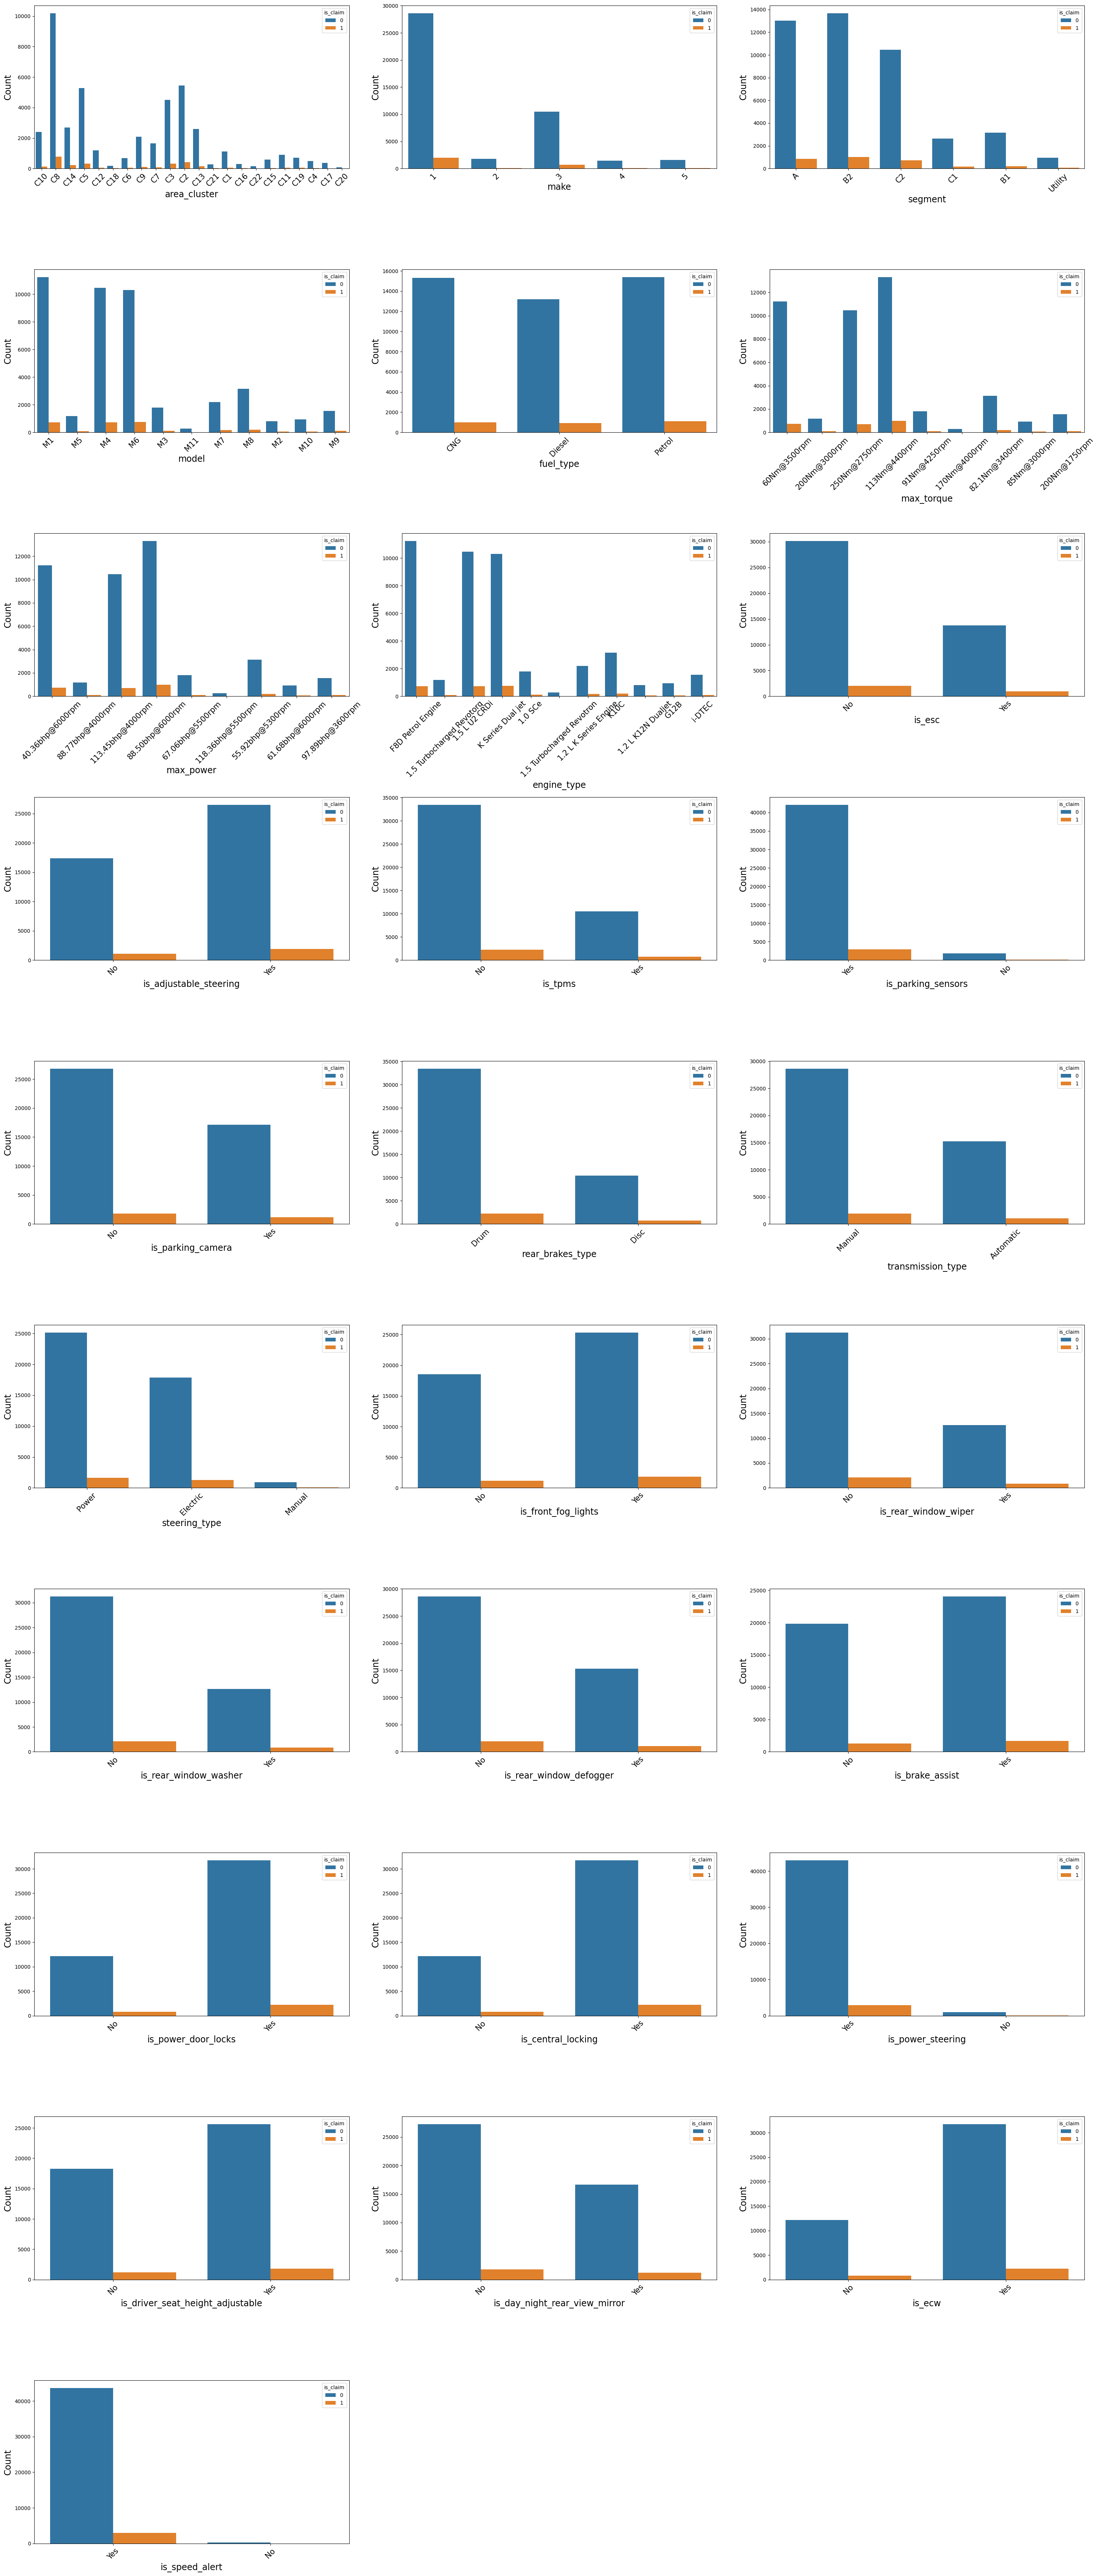

In [15]:
## VISUALIZE CATEGORICAL VARIABLES
# Plotting each of the input variable against the count of policyholder that have filed a claim
y_label = 'Count'

# Number of rows and columns for subplots
ncols = 3
nrows = math.ceil(len(categorical_col) / ncols)

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize = (30, 7*nrows))
axs = axs.flatten()

# Loop through categorical columns
for i, col in enumerate(categorical_col):
    sns.countplot(data=train_df, x=col, hue='is_claim', ax=axs[i])
    axs[i].set_ylabel(y_label, fontsize=17)
    axs[i].set_xlabel(col, fontsize=17)
    axs[i].tick_params(axis='x', rotation=45, labelsize=15)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
                  

#### Index Analysis

In [16]:
# Calculate and display claim rates for each category in categorical columns
# Calculate overall claim rate
overall_rate = train_df['is_claim'].mean()

# Calculate and display claim rates for each category in categorical columns
for col in categorical_col:
    temp = (
        train_df.groupby(col)['is_claim']
        .mean()
        .reset_index()
        .assign(index=lambda x: x['is_claim'] / overall_rate)
        .sort_values('index', ascending=False)
    )
    print(f"\n--- {col} ---")
    print(temp[temp['index'] > 1])



--- area_cluster ---
   area_cluster  is_claim     index
9           C18  0.108808  1.701191
14          C22  0.093750  1.465758
10          C19  0.079016  1.235389
5           C14  0.077900  1.217944
16           C4  0.076208  1.191496
20           C8  0.070190  1.097401
11           C2  0.069418  1.085340
13          C21  0.069079  1.080033
15           C3  0.068623  1.072910
18           C6  0.066940  1.046589

--- make ---
   make  is_claim     index
3     4  0.069186  1.081713
0     1  0.064309  1.005460
2     3  0.064049  1.001385

--- segment ---
  segment  is_claim     index
2      B2  0.069069  1.079875
4      C2  0.064049  1.001385

--- model ---
  model  is_claim     index
6    M5  0.075531  1.180910
3    M2  0.074713  1.168114
8    M7  0.069403  1.085104
7    M6  0.068254  1.067132
5    M4  0.064049  1.001385

--- fuel_type ---
  fuel_type  is_claim     index
2    Petrol  0.066873  1.045543
1    Diesel  0.064738  1.012163

--- max_torque ---
      max_torque  is_claim     

- Most categories have claim rates that are proportional to the overall average, with index values around 1.0, indicating no strong deviation from the average risk.
- However, several area clusters notably C18, C22, C19, C14, and C4, show over-indexing of 1.2 or higher, suggesting that policyholders in these areas are more prone to car accidents and claim filings.
- There is an opportunity for further analysis of these high-risk areas, such as examiing population density or the average age of policyholders in each city. 


Other notable over-indexed categories:
- Car models: M5 (index = 1.18) and M2 (index = 1.17)
- Engine specification: Max torque 200 Nm @ 3000 rpm (index = 1.18)
- Engine type: 1.5 Turbocharged Revotorq (index = 1.18) and 1.2 L K12N Dualjet (index = 1.17)

These over-indexed segments may represent higher-risk groups across both geographic area and vehicle level attributes, which could be leveraged for targeted pricing or risk mitigation strategy.

## Numerical Variables

### Torque

**Nm = Newton per Metre, rpm = Revolutions per Minute (measure of how fast the engine is spinning)**

Could standardize torque and power by rpm. 

High torque:

- has higher acceleration
- at lower rpm it's more energy efficient
- more towing capacity

Low torque:

- tends to operates at higher rpm for speed
- better fuel economy (ideal for city commuting and long distance travel when fuel costs are a concern)
- smooth power delivery: these engines provide a smoother and more gradual power delivery, which is appreciated in stop-and-go traffic and during motorway cruising  
- weight savings: smaller engines are typically lighter, contributing to improved handling and agility in smaller vehicles


In [17]:
train_df['max_torque'].value_counts()

113Nm@4400rpm     14280
60Nm@3500rpm      11965
250Nm@2750rpm     11179
82.1Nm@3400rpm     3332
91Nm@4250rpm       1909
200Nm@1750rpm      1653
200Nm@3000rpm      1271
85Nm@3000rpm        994
170Nm@4000rpm       290
Name: max_torque, dtype: int64

In [18]:
# STANDARDIZE THE TORQUE TO RPM RATIO
# regex - digit (decimal or int) before Nm and rpm
train_df['torque'] = train_df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
train_df['rpm'] = train_df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
train_df['torque'] = pd.to_numeric(train_df['torque'])
train_df['rpm'] = pd.to_numeric(train_df['rpm'])

# Calculate torque to RPM ratio 
train_df['torque per rpm'] = train_df['torque'] / train_df['rpm']

In [19]:
train_df['torque per rpm'].value_counts()

0.025682    14280
0.017143    11965
0.090909    11179
0.024147     3332
0.021412     1909
0.114286     1653
0.066667     1271
0.028333      994
0.042500      290
Name: torque per rpm, dtype: int64

In [20]:
# Drop columns
# train_df.drop(columns = ['max_torque', 'torque', 'rpm'], inplace = True)
train_df.drop(columns = ['torque', 'rpm'], inplace = True)


### Power

**bhp = brake horsepower, rpm = Revolutions per Minute (measure of how fast the engine is spinning)**

https://www.autotrader.co.uk/content/advice/what-are-horsepower-and-torque-and-why-does-it-matter?refresh=true

Brake horsepower refers to the horsepower of the car after taking into consideration friction between a car’s tyres and the road.


In [21]:
train_df['max_power'].value_counts()

88.50bhp@6000rpm     14280
40.36bhp@6000rpm     11965
113.45bhp@4000rpm    11179
55.92bhp@5300rpm      3332
67.06bhp@5500rpm      1909
97.89bhp@3600rpm      1653
88.77bhp@4000rpm      1271
61.68bhp@6000rpm       994
118.36bhp@5500rpm      290
Name: max_power, dtype: int64

In [22]:
# STANDARDIZE THE TORQUE TO RPM RATIO
# regex - digits (decimal or int) before bhp and rpm
train_df['power'] = train_df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
train_df['rpm'] = train_df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
train_df['power'] = pd.to_numeric(train_df['power'])
train_df['rpm'] = pd.to_numeric(train_df['rpm'])

# Calculate torque to RPM ratio 
train_df['power per rpm'] = train_df['power'] / train_df['rpm']

In [23]:
train_df['power per rpm'].value_counts()

0.014750    14280
0.006727    11965
0.028363    11179
0.010551     3332
0.012193     1909
0.027192     1653
0.022193     1271
0.010280      994
0.021520      290
Name: power per rpm, dtype: int64

In [24]:
# Drop columns
# train_df.drop(columns = ['max_power', 'power', 'rpm'], inplace = True)
train_df.drop(columns = ['power', 'rpm'], inplace = True)

### Analysis

In [25]:
# Get numerical variables
numerical_col = train_df.select_dtypes(include=[np.number]).columns
train_df[numerical_col]

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,torque per rpm,power per rpm
56028,0.304135,0.04,0.471154,73430,2,796,3,5,4.60,3445,1515,1475,1185,0,0,0.017143,0.006727
7550,1.029043,0.12,0.596154,8794,2,1497,4,5,5.00,3990,1755,1523,1490,5,0,0.066667,0.022193
41024,0.722817,0.04,0.288462,8794,6,1493,4,6,5.20,4300,1790,1635,1720,3,0,0.090909,0.028363
16155,0.992249,0.03,0.423077,73430,2,796,3,5,4.60,3445,1515,1475,1185,0,0,0.017143,0.006727
42083,0.088165,0.13,0.375000,73430,2,1197,4,5,4.80,3845,1735,1530,1335,2,0,0.025682,0.014750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44675,0.565635,0.01,0.442308,27003,6,1197,4,5,4.85,3990,1745,1500,1410,0,0,0.025682,0.014750
25342,0.436947,0.11,0.576923,8794,2,1497,4,5,5.00,3990,1755,1523,1490,5,0,0.066667,0.022193
46632,0.645659,0.21,0.365385,5410,6,1493,4,6,5.20,4300,1790,1635,1720,3,0,0.090909,0.028363
47899,0.298040,0.03,0.644231,4990,2,796,3,5,4.60,3445,1515,1475,1185,0,0,0.017143,0.006727


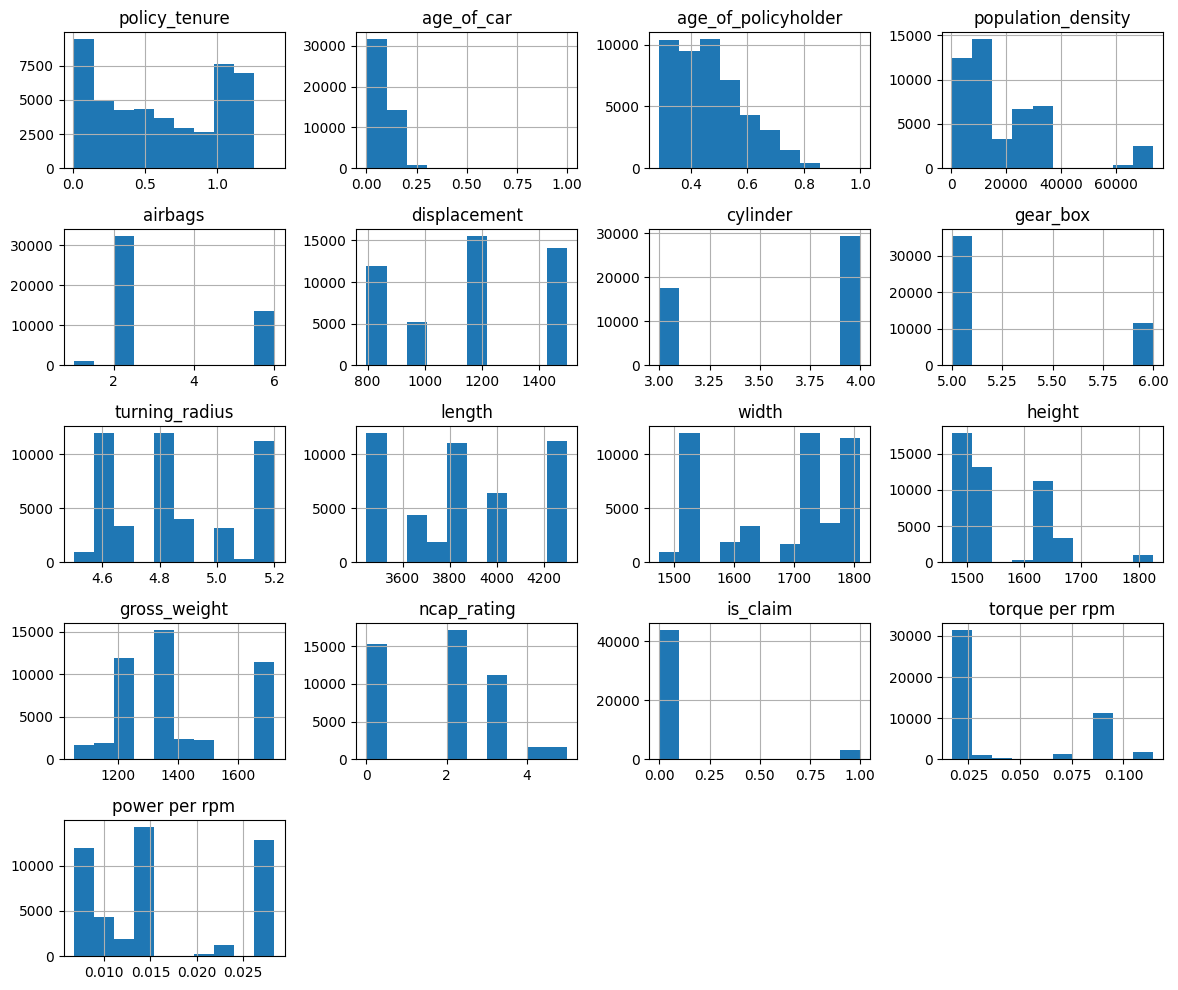

In [26]:
# Visualizing distribution of numerical variables
train_df[numerical_col].hist(figsize=(12, 10))
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

### Correlation Analysis

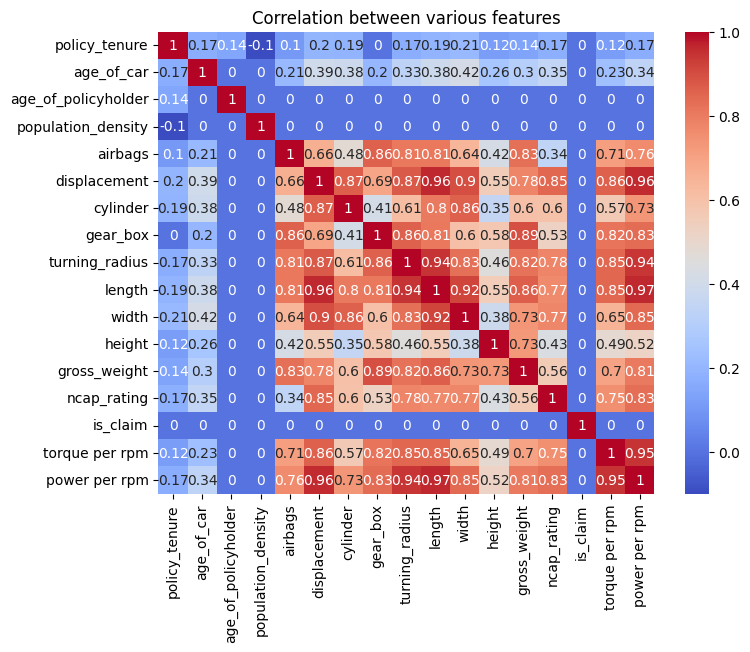

In [27]:
# Visualizing the correlation using heatmaps from seaborn library
highcorr = train_df[numerical_col].corr()
highcorr[np.abs(highcorr) < 0.1] = 0
plt.figure(figsize=(8,6))
sns.heatmap(highcorr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between various features")
plt.show()# Visualizing the correlation using heatmaps from seaborn library

# Data Processing

## Categorical Variables

**Ordinal Data (has an order):** max_torque, max_power, segment(?)

**Nominal (no order):** area_cluster, segment (?), model, fuel_type, engine_type, steering_type

**Binary:** is_esc, is_adjustable_steering, is_tpms, is_parking_sensors, is_parking_camera, rear_brakes_type, transmission_type,
is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer, is_rear_window_defogger, is_brake_assist, is_power_door_locks, 
is_central_locking, is_power_steering, is_driver_seat_height_adjustable, is_day_night_rear_view_mirror, is_ecw, is_speed_alert

---
**Segment**

---
- For data processing of segment of vehicle types, consider applying either label encoding or one-hot encoding or both (let's the model decide)
- Could also consider target encoding, however, based on the index analysis, the claim ratios across segments were mostly proportional to the overall claim rate, therefore it might not add additional information for the model.
- The segments generally follow an ordinal pattern (A < B < C in size); however, the size differences are not strictly proportional. Therefore, applying label encoding could introduce bias when modelling with regression-based algorithms.
- Utility vehicle - a truck with low sides designed for carry small loads. Because it's in a small portion, it could be classified into an infrequent category with any other unknown categories from the non-training dataset (check for the sample size to ensure sufficient representation).

In [28]:
train_df['segment'].value_counts().to_frame('count').assign(
    percentage=lambda x: round(100 * x['count'] / x['count'].sum(), 2)
)

,count,percentage
B2,14681,31.32
A,13874,29.60
C2,11179,23.85
B1,3332,7.11
C1,2813,6.00
Utility,994,2.12


Keep utility as its own category and assigns A < B < C < Utility using label encoding

---
**Fuel Type and Steering Type**

---
- Based on the index analysis, fuel type and steering type did not show any significant variation in claim propensity across categories.
- As there are only three types in each category, apply one-hot encoding 

---
**Area of Cluster, Engine Type, and Model** 

---

- There are 20 area clusters, 11 engine types, and 11 models
- Based on the index-analysis, it has shown that some of the classes are more prone to accidents, suggesting higher claim propensity. 
- One-hot encoding can be applied only to those over-indexed classes so it retains these signals while preventing the dimensionality of the dataset from exploding. 
- It is also beneficial to include target encoding as it captures the relative risk directly without removing information. However, it will lose its interpretability.
- Include both encodings and let the model decide.   

## Transform

In [29]:
train_df, test_df = train_test_split(df,test_size=0.2, random_state=123,stratify=df['is_claim'])

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (46873, 44)
Test shape: (11719, 44)


In [30]:
train_df['make'] = train_df['make'].astype('object')
test_df['make'] = test_df['make'].astype('object')  

train_df.drop(columns = 'policy_id', inplace = True)
test_df.drop(columns = 'policy_id', inplace = True)  

In [31]:
from custom_transformers import *

In [32]:
from sklearn.pipeline import Pipeline
import numpy as np

def get_feature_names(preprocessor):
    """
    Safely extract all output feature names from a ColumnTransformer (even with nested pipelines or custom transformers).
    """
    output_features = []

    for name, trans, cols in preprocessor.transformers_:
        if trans == 'drop' or name == 'remainder':
            continue

        # Handle Pipeline steps
        if isinstance(trans, Pipeline):
            last_step = trans.steps[-1][1]
            if hasattr(last_step, 'get_feature_names_out'):
                # Nested transformers that support get_feature_names_out
                names = last_step.get_feature_names_out(cols)
            else:
                names = cols  # fallback
        # Handle OneHotEncoder and similar
        elif hasattr(trans, 'get_feature_names_out'):
            names = trans.get_feature_names_out(cols)
        # Handle custom transformers that output DataFrames
        elif hasattr(trans, 'transform'):
            try:
                # Run transform on a dummy DataFrame to infer columns
                dummy = pd.DataFrame({c: [0] for c in cols})
                out = trans.transform(dummy)
                if isinstance(out, pd.DataFrame):
                    names = out.columns.tolist()
                else:
                    # Fall back to generic naming if numpy array
                    names = [f"{name}_{i}" for i in range(out.shape[1])]
            except Exception:
                names = cols
        # Handle passthrough
        elif trans == 'passthrough':
            names = cols
        else:
            names = cols

        output_features.extend(names)

    return np.array(output_features)


In [65]:
# --- Define variables ---
target = 'is_claim'
threshold = 1.2

# --- Define columns ---
numerical_col = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 
    'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 
    'length', 'width', 'height', 'gross_weight', 'ncap_rating', 
    'max_torque', 'max_power'
]

log_cols = ['age_of_car', 'age_of_policyholder']  # skewed columns
scale_only_cols = list(set(numerical_col) - set(log_cols))  # rest of the numeric ones

index_encoded_cols = ['area_cluster', 'engine_type', 'model']

onehot_cols = ['fuel_type', 'steering_type']

ordinal_cols = ['segment']
OE = OrdinalEncoder(categories=[['A', 'B1', 'B2', 'C1', 'C2', 'Utility']])

encoded_cols = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 
    'rear_brakes_type', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_wiper', 
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 
    'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert'
]
binary_encoder = OrdinalEncoder()

# --- Numeric transformation pipelines ---
log_transformer = FunctionTransformer(np.log1p, validate=False)

log_numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

scale_numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# --- Define categorical transformers ---
transformers = []

# Index-based encoders
for col in index_encoded_cols:
    transformers.append(
        (f'{col}_indexenc', IndexBasedEncoder(col=col, target=target, threshold=threshold), [col])
    )

# One-hot encoding
transformers.append(
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), onehot_cols)
)

# Ordinal encoding
transformers.append(
    ('ordinal', OE, ordinal_cols)
)

# Binary flags
transformers.append(
    ('labelencode', binary_encoder, encoded_cols)
)

# Log + scale numeric
transformers.append(
    ('log_numeric', log_numeric_pipeline, log_cols)
)

# Scale-only numeric
transformers.append(
    ('scaled_numeric', scale_numeric_pipeline, scale_only_cols)
)

# --- Combine into ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='drop'
)

# --- Build pipeline (no model yet) ---
pipeline = Pipeline([
    ('extract_torque_rpm', TorqueRPMExtractor(torque_col='max_torque')),
    ('extract_power_rpm', PowerRPMExtractor(power_col='max_power')),
    ('preprocessor', preprocessor)
])

# --- Fit on training data ---
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

pipeline.fit(X_train, y_train)

# --- Transform both training and test datasets ---
X_train_processed = pipeline.transform(X_train)

X_test = test_df.drop(columns=[target], errors='ignore')
X_test_processed = pipeline.transform(X_test)

# Create DataFrames
feature_names = get_feature_names(pipeline.named_steps['preprocessor'])

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

print("✅ Processed training shape:", X_train_processed_df.shape)
print("✅ Processed testing shape:", X_test_processed_df.shape)
X_train_processed_df.head()


✅ Processed training shape: (46873, 51)
✅ Processed testing shape: (11719, 51)


,area_cluster_C14,area_cluster_C18,area_cluster_C19,area_cluster_C22,area_cluster_Other,area_cluster_te,engine_type_Other,engine_type_te,model_Other,model_te,...,width,cylinder,policy_tenure,gear_box,airbags,length,make,population_density,gross_weight,displacement
56028,0.0,0.0,0.0,0.0,1.0,0.051628,1.0,0.061596,1.0,0.061596,...,-1.399819,-1.295789,-0.740144,-0.569163,-0.619174,-1.300832,-0.669788,3.094999,-0.944248,-1.375127
7550,0.0,0.0,0.0,0.0,1.0,0.070190,1.0,0.075531,1.0,0.075531,...,0.739715,0.771730,1.009737,-0.569163,-0.619174,0.450160,1.978684,-0.568082,0.493961,1.260350
41024,0.0,0.0,0.0,0.0,1.0,0.070190,1.0,0.064049,1.0,0.064049,...,1.051730,0.771730,0.270528,1.756966,1.564040,1.446137,1.095860,-0.568082,1.578511,1.245312
16155,0.0,0.0,0.0,0.0,1.0,0.051628,1.0,0.061596,1.0,0.061596,...,-1.399819,-1.295789,0.920920,-0.569163,-0.619174,-1.300832,-0.669788,3.094999,-0.944248,-1.375127
42083,0.0,0.0,0.0,0.0,1.0,0.051628,1.0,0.068254,1.0,0.068254,...,0.561420,0.771730,-1.261480,-0.569163,-0.619174,-0.015700,-0.669788,3.094999,-0.236932,0.132471


In [67]:
# X_train_processed_df = X_train_processed_df.apply(pd.to_numeric, errors='ignore')
X_train_processed_df.dtypes

area_cluster_C14                    float64
area_cluster_C18                    float64
area_cluster_C19                    float64
area_cluster_C22                    float64
area_cluster_Other                  float64
area_cluster_te                     float64
engine_type_Other                   float64
engine_type_te                      float64
model_Other                         float64
model_te                            float64
fuel_type_Diesel                    float64
fuel_type_Petrol                    float64
steering_type_Manual                float64
steering_type_Power                 float64
segment                             float64
is_esc                              float64
is_adjustable_steering              float64
is_tpms                             float64
is_parking_sensors                  float64
is_parking_camera                   float64
rear_brakes_type                    float64
transmission_type                   float64
is_front_fog_lights             

In [66]:
X_train_processed_df['is_esc']

56028    0.0
7550     0.0
41024    1.0
16155    0.0
42083    0.0
        ... 
44675    1.0
25342    0.0
46632    1.0
47899    0.0
38077    1.0
Name: is_esc, Length: 46873, dtype: float64

# Model Training

In [68]:
def train_model(X,y,model_name):
    
    #fit the model with the training data
    model = model_name()
    model.fit(X, y)
    
    return model

def evaluate(X_test,y_test, model, threshold=0.5):
    
    predicted_proba = model.predict_proba(X_test)
    y_pred = (predicted_proba [:,1] >= threshold).astype('int')
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    
    yproba = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    return fpr,tpr,auc, precision,recall, f1


def visualise(results_report):

    fig = plt.figure(figsize=(8,6))

    for segment in results_report['Segment']:
        for i in results_report[results_report['Segment']==segment].index:
            plt.plot(results_report.loc[i]['fpr'], 
                    results_report.loc[i]['tpr'], 
                    label="{}, AUC={:.3f}".format(segment, results_report.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()


In [70]:
model_dict = dict(zip(['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
                      ,[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier]))

results_report = []

# loop through each model
for model_string, model_name in model_dict.items():
    
    print(model_string)

    if model_string == 'LogisticRegression':

        # Fit and train models
        model = train_model(X_train_processed_df, y_train, model_name)
        
        #evaluate and save results  
        for threshold in [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
            fpr, tpr, auc, precision, recall, f1 = evaluate(X_test_processed_df, y_test, model, threshold)

            results_report.append([model_string, threshold, recall, precision, fpr, tpr, auc, f1])

    else:
        # Fit and train models (Other models does not need the data to be scaled)
        model = train_model(X_train_processed_df, y_train, model_name)
        
        #evaluate and save results  
        for threshold in [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
            fpr, tpr, auc, precision, recall, f1 = evaluate(X_test_processed_df, y_test, model, threshold)
            results_report.append([model_string, threshold, recall, precision, fpr, tpr, auc, f1])

LogisticRegression


/Users/aiomote/Data Science Projects/Car Insurance Claim Prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aiomote/Data Science Projects/Car Insurance Claim Prediction/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aiomote/Data Science Projects/Car Insurance Claim Prediction/env/lib/

DecisionTreeClassifier
RandomForestClassifier
XGBClassifier


/Users/aiomote/Data Science Projects/Car Insurance Claim Prediction/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
threshold = 0.5 
all_results_report_base_model = pd.DataFrame(results_report, 
                                             columns = ['Segment', 'threshold', 'Recall', 'Precision', 'fpr', 'tpr', 'auc', 'F1 Score'])
all_results_report_base_model[['Segment', 'auc', 'Recall', 'Precision', 'F1 Score']][all_results_report_base_model['threshold']==threshold].drop_duplicates().sort_values(by = 'auc', ascending=False)

,Segment,auc,Recall,Precision,F1 Score
35,XGBClassifier,0.619026,0.002667,0.125000,0.005222
5,LogisticRegression,0.601339,0.000000,0.000000,0.000000
25,RandomForestClassifier,0.567942,0.008000,0.071429,0.014388
15,DecisionTreeClassifier,0.508856,0.098667,0.076923,0.086449


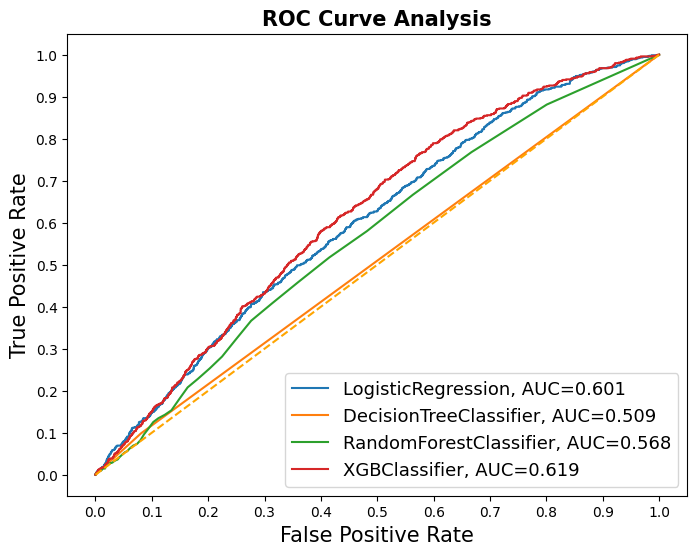

In [72]:
# Visualise the results 
threshold =0.5

results_threshold = all_results_report_base_model[all_results_report_base_model['threshold']==threshold]
visualise(results_threshold)
# visualise(all_results_report_base_model)

In [78]:
# 5 fold cross validation
def hyperparameter_tuning(X_train, y_train, X_test, y_test, 
                          model_type='LogisticRegression', k=5):
    
    predictions = []
    results = []

    # fit model here
    if model_type == 'LogisticRegression':
        
        # Tune hyperparameters
        tune_parameters = {'C':(100, 10, 1, 0.1, 0.01),
                          'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
        clf = GridSearchCV(LogisticRegression(), tune_parameters, cv=k, refit=False)
        clf.fit(X_train, y_train)
        
        # Fit CV model on full training set
        model = LogisticRegression(**clf.best_params_)
        model.fit(X_train, y_train)
        
        # predict on test set
        y_prob_cv = model.predict_proba(X_test)[:,1]
        predictions.append([y_test, y_prob_cv])
    
    # if model_type == 'RandomForestClassifier':
    #     # tune L2 penalty and max depth on training set
    #     tune_parameters = [{'n_estimators': [] # number of trees
            
    #         'lambda':(1, 10, 100),
    #                     'max_depth':(3, 5),
    #                     'eval_metric':['logloss']}]
    #     clf = GridSearchCV(XGBClassifier(use_label_encoder=False), tune_parameters, cv=k, refit=False)
    #     clf.fit(X_train, y_train)
        
    #     # 
    #     model = XGBClassifier(use_label_encoder=False, **clf.best_params_)
    #     model.fit(X_train, y_train)
    #     y_prob_cv = model.predict_proba(X_test)[:,1]
    #     predictions.append([y_test, y_prob_cv])

    if model_type == 'XGBClassifier':
        
        # tune L2 penalty and max depth on training set
        tune_parameters = {'lambda':[1, 10, 100], # default 1 
                            'alpha':[0, 1, 10, 50], # default 0
                            'max_depth':[3, 6, 10]} # default 6
        clf = GridSearchCV(XGBClassifier(use_label_encoder=False), tune_parameters, scoring='roc_auc',cv=k, refit=False)
        clf.fit(X_train, y_train)
        
        # Train model
        model = XGBClassifier(use_label_encoder=False, **clf.best_params_)
        model.fit(X_train, y_train)
        y_prob_cv = model.predict_proba(X_test)[:,1]
        predictions.append([y_test, y_prob_cv])

    # Print best features
    print('Best parameters: ', clf.best_params_)

    # Evaluation
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_cv)
    auc = roc_auc_score(y_test, y_prob_cv)
    
    results.append([model_type, thresholds, fpr, tpr, auc, clf.best_params_])

    # evaluate model and save results
    results = pd.DataFrame(results, columns = ['Model', 'threshold','fpr','tpr','auc','params'])    
    predictions = pd.DataFrame(predictions, columns = ['actual', 'predicted'])

    return results, predictions, model

In [79]:
def plot_roc_curve(results_report):
    fig = plt.figure(figsize=(8,6))
    
    plt.plot(results_report['fpr'][0],
             results_report['tpr'][0], 
             label="AUC={:.3f}".format(results_report['auc'][0]))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()

In [80]:
lr_results, lr_preds, lr_model = hyperparameter_tuning(X_train=X_train_processed_df,
                                              X_test=X_test_processed_df,
                                              y_train= y_train,
                                              y_test= y_test,
                                              model_type='LogisticRegression',
                                              k=5)

/Users/aiomote/Data Science Projects/Car Insurance Claim Prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aiomote/Data Science Projects/Car Insurance Claim Prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aiomote/Data Science Projects/Car Insurance Claim Prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aiomote/Data Science Projects/Car Insurance Claim Prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ig

Best parameters:  {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}


,0
area_cluster_te,14.888636
policy_tenure,0.340758
width,0.275104
cylinder,0.222072
length,0.157656
is_rear_window_defogger,0.128422
max_torque,0.109355
displacement,0.094758
height,0.091288
max_power,0.082790


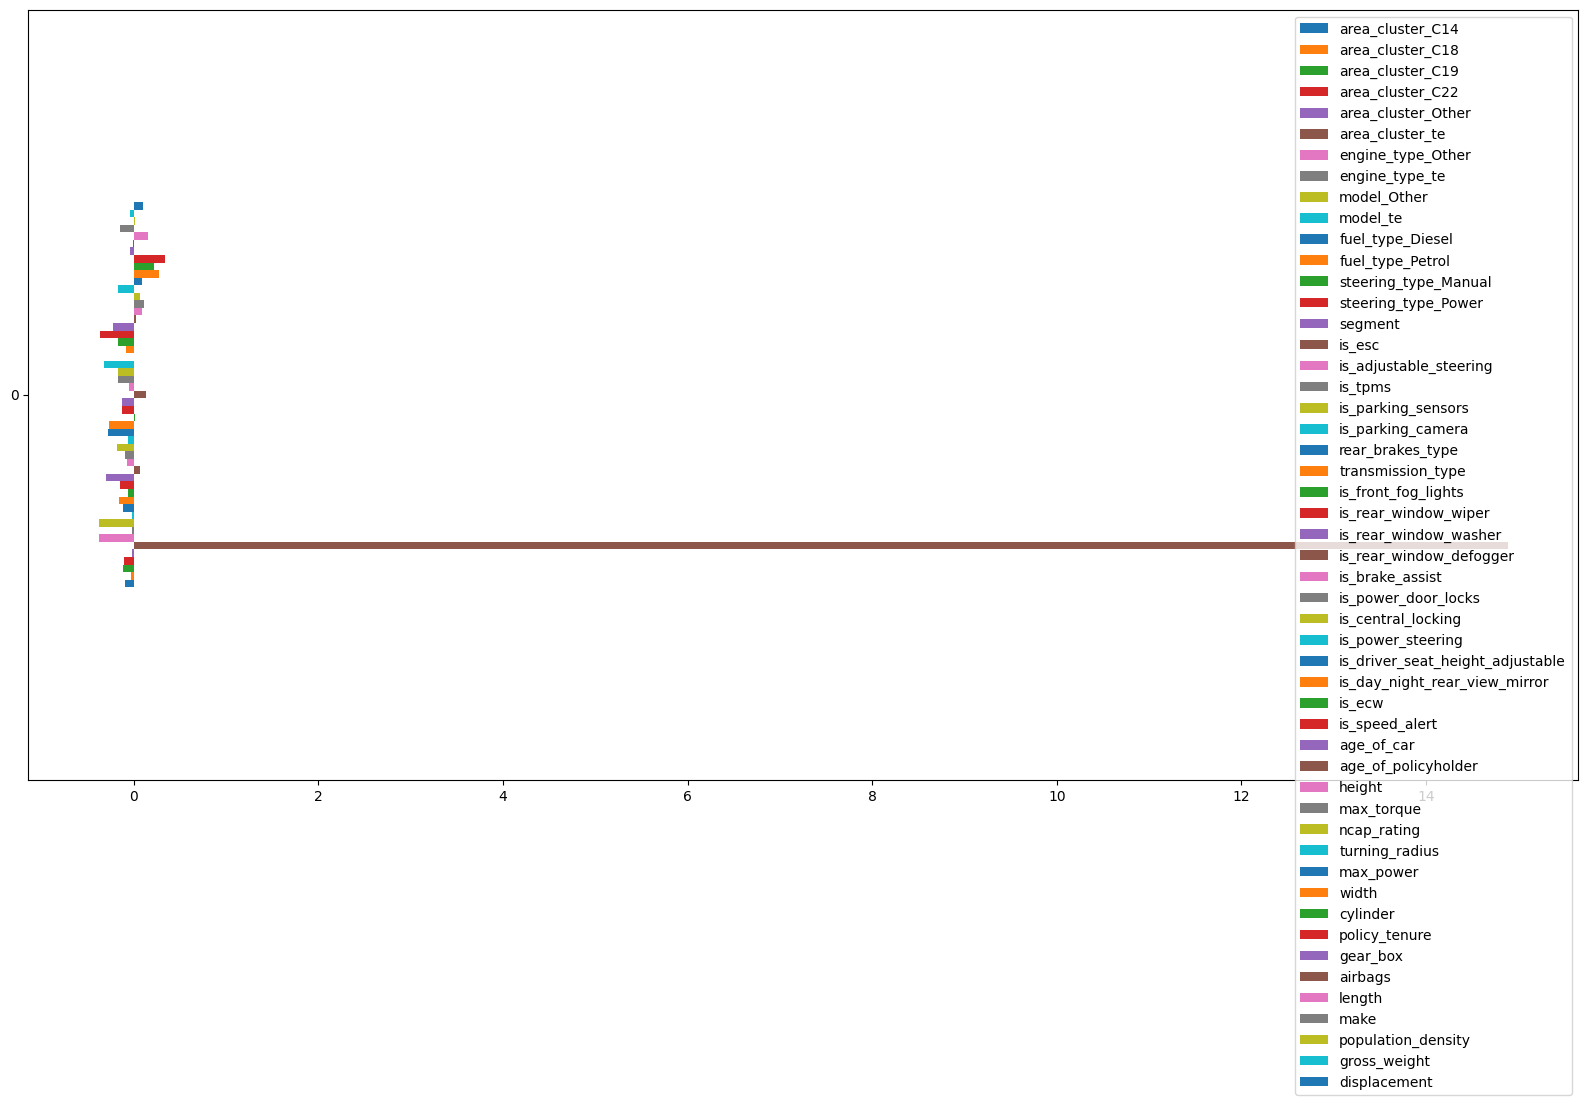

In [82]:
# observe model coefficients
coeff=pd.DataFrame(lr_model.coef_)
coeff.columns = X_train_processed_df.columns
coeff.plot.barh(figsize=(20,10))

coeff.transpose().sort_values(by=0, ascending=False)

In [83]:
from sklearn.linear_model import LogisticRegressionCV

log_reg_cv = LogisticRegressionCV(
    penalty='elasticnet',
    solver='saga',
    l1_ratios=[0.5],   # mix of L1/L2
    cv=5,
    max_iter=5000,
    scoring='roc_auc'
)

log_reg_cv.fit(X_train_processed_df, y_train)


LogisticRegressionCV(cv=5, l1_ratios=[0.5], max_iter=5000, penalty='elasticnet',
                     scoring='roc_auc', solver='saga')

In [84]:
y_pred_proba = log_reg_cv.predict_proba(X_test_processed_df)[:, 1]  # probability for positive class
y_pred = log_reg_cv.predict(X_test_processed_df)  # hard classification


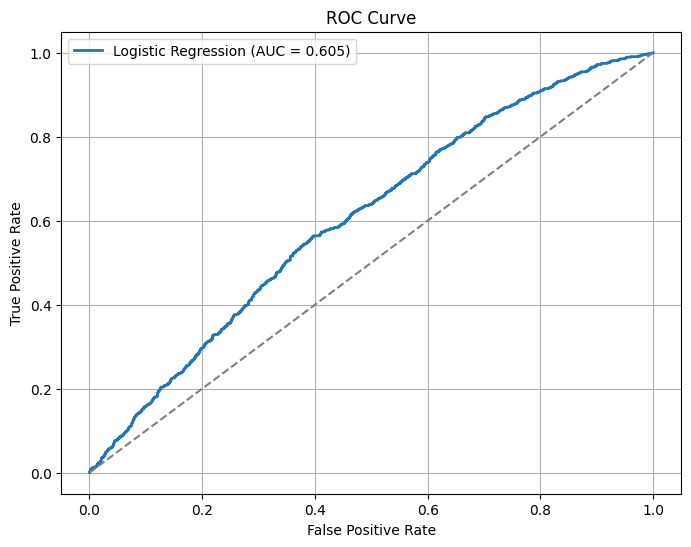

ROC AUC: 0.605


In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"ROC AUC: {roc_auc:.3f}")


In [92]:
coef = log_reg_cv.coef_[0]
intercept = log_reg_cv.intercept_[0]

coefficients = pd.DataFrame({
    'feature': X_train_processed_df.columns,
    'coefficient': coef
}).sort_values(by='coefficient', ascending=False)

coefficients[coefficients['coefficient'] > 0.001]


,feature,coefficient
5,area_cluster_te,13.801188
43,policy_tenure,0.341316
42,cylinder,0.175516
1,area_cluster_C18,0.076667
38,ncap_rating,0.045127
4,area_cluster_Other,0.033611
15,is_esc,0.029200
35,age_of_policyholder,0.026177
41,width,0.020363
48,population_density,0.009302


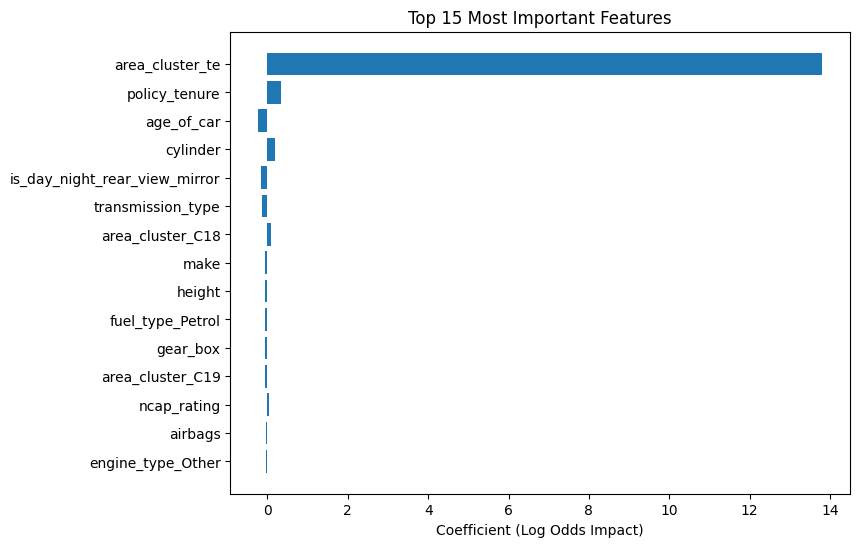

In [90]:
top_n = 15
plt.figure(figsize=(8, 6))
top_features = coefficients.reindex(coefficients.coefficient.abs().sort_values(ascending=False).index).head(top_n)
plt.barh(top_features['feature'], top_features['coefficient'])
plt.xlabel('Coefficient (Log Odds Impact)')
plt.title(f'Top {top_n} Most Important Features')
plt.gca().invert_yaxis()
plt.show()
